## Imports

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [63]:
np.random.seed(0)
width, height = 10, 10

## Funções auxiliares

In [64]:
def read_ppm(content):
    lines = content.split('\n')
    lines = [line for line in lines if not line.startswith('#') and not line.strip() == '']

    width, height = map(int, lines[1].split())
    
    max_val = int(lines[2].strip())
    pixel_data = [int(value) for line in lines[3:] for value in line.split()]
    pixels = np.array(pixel_data, dtype=np.uint8).reshape((height, width, 3))
    
    return pixels

In [65]:
def write_ppm(filename, pixels):
    height, width, colors = pixels.shape
    assert colors == 3, "Image must have 3 color channels"
    
    header = f'P3\n{width} {height}\n255\n'
    with open(filename, 'w') as f:
        f.write(header)
        for row in pixels:
            for pixel in row:
                f.write(' '.join(str(value) for value in pixel) + ' ')
            f.write('\n')

In [66]:
def plot_results(image_paths):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
    for ax, image_path in zip(axes, image_paths):
        image_content = open(image_path, 'r').read()
        image_data = read_ppm(image_content)
        ax.imshow(image_data)
        ax.axis('off')
    plt.show()

## Criação de uma imagem aleatória

In [67]:
image_data = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

ppm_file = 'atividade_1_imgs/image.ppm'
write_ppm(ppm_file, image_data)

### 1. Implemente uma função que receba uma imagem em formato PPM, o tamanho `n` de um filtro espacial com dimensões `n × n` e a matriz com os pesos do filtro, e aplique o filtro com uma convolução, gerando e salvando a imagem resultante no disco em formato PPM. Você não pode usar a OpenCV em nenhum desses passos. As especificações do formato PPM podem ser encontradas aqui: [https://netpbm.sourceforge.net/doc/ppm.html](https://netpbm.sourceforge.net/doc/ppm.html)

In [68]:
def apply_filter(image, filter_size, filter_weights):
    assert filter_weights.shape == (filter_size, filter_size), "Filter weights must be of shape (n, n)"

    pad_width = filter_size // 2
    padded_image = np.pad(image, [(pad_width, pad_width), (pad_width, pad_width), (0, 0)], mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)
    
    # Iterate over every pixel in the image
    for i in range(pad_width, padded_image.shape[0] - pad_width):
        for j in range(pad_width, padded_image.shape[1] - pad_width):
            for k in range(image.shape[2]):
                # Perform convolution
                region = padded_image[i - pad_width:i + pad_width + 1, j - pad_width:j + pad_width + 1, k]
                filtered_value = np.sum(region * filter_weights)
                filtered_image[i - pad_width, j - pad_width, k] = np.clip(filtered_value, 0, 255)
    
    return filtered_image

In [69]:
n = 3
filter_weights = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16  # Gaussian blur filter
ppm_filename = 'atividade_1_imgs/image.ppm'
image_data = read_ppm(open(ppm_filename, 'r').read())

filtered_image_data = apply_filter(image_data, n, filter_weights)

filtered_ppm_filename = 'atividade_1_imgs/filtered_image.ppm'
write_ppm(filtered_ppm_filename, filtered_image_data)

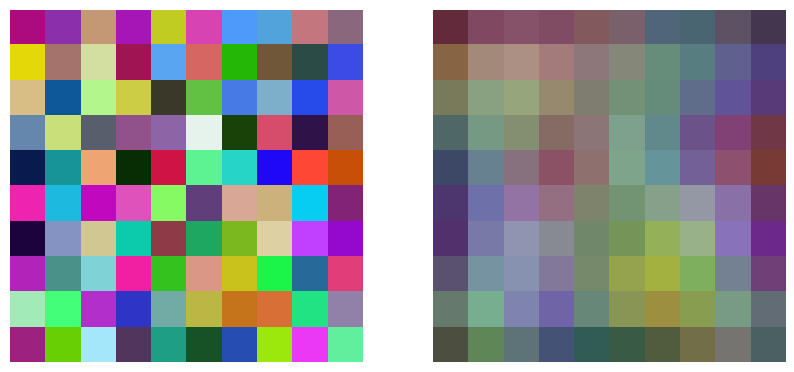

In [70]:
image = 'atividade_1_imgs/image.ppm'
filtered_image = 'atividade_1_imgs/filtered_image.ppm'

results = [image, filtered_image]
plot_results(results)

### 2. Usando a função da questão 1, pesquise um filtro passa-alta e aplique-o em 3 imagens distintas, variando o valor de `n` em 3 unidades em cada imagem. O que acontece quando `n` cresce?

In [71]:
np.random.seed()

In [72]:
image_data = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
ppm_file = 'atividade_1_imgs/image_21.ppm'
write_ppm(ppm_file, image_data)

In [73]:
image_data = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
ppm_file = 'atividade_1_imgs/image_22.ppm'
write_ppm(ppm_file, image_data)

In [74]:
image_data = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
ppm_file = 'atividade_1_imgs/image_23.ppm'
write_ppm(ppm_file, image_data)

IMAGENS UTILIZADAS:


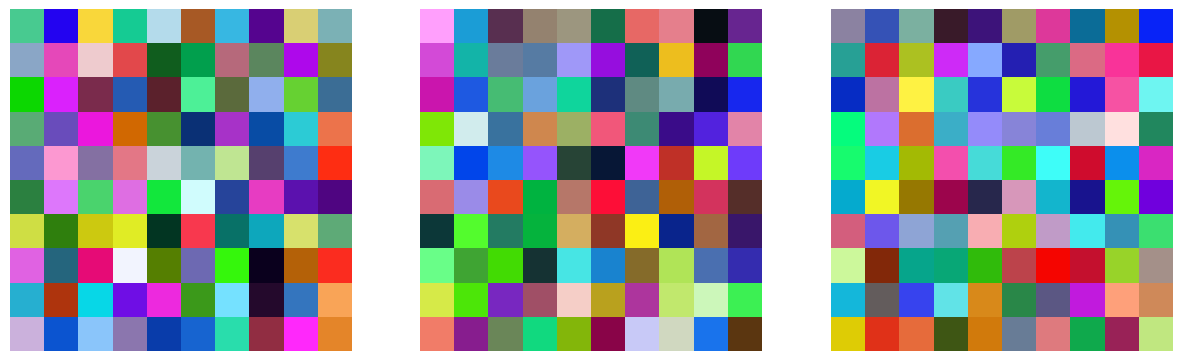

In [75]:
result = ['atividade_1_imgs/image_21.ppm','atividade_1_imgs/image_22.ppm','atividade_1_imgs/image_23.ppm']
print('IMAGENS UTILIZADAS:')
plot_results(result)

In [76]:
filtro_1 = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

In [77]:
filtro_2 = np.array([
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 49, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1]
])

In [78]:
filtro_3 = np.array([
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, 81, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1]
])

In [79]:
images = ['atividade_1_imgs/image_21.ppm', 'atividade_1_imgs/image_22.ppm', 'atividade_1_imgs/image_23.ppm']
filters = [filtro_1, filtro_2, filtro_3]

In [80]:
results_2 = []
for image in images:
    results = []
    for filter in filters:
        ppm_filename = image
        image_data = read_ppm(open(ppm_filename, 'r').read())
        filtered_image_data = apply_filter(image_data, len(filter), filter)

        filtered_ppm_filename = f'{image}_{len(filter)}_filtered_image.ppm'
        write_ppm(filtered_ppm_filename, filtered_image_data)

        results.append(filtered_ppm_filename)
    results_2.append(results)

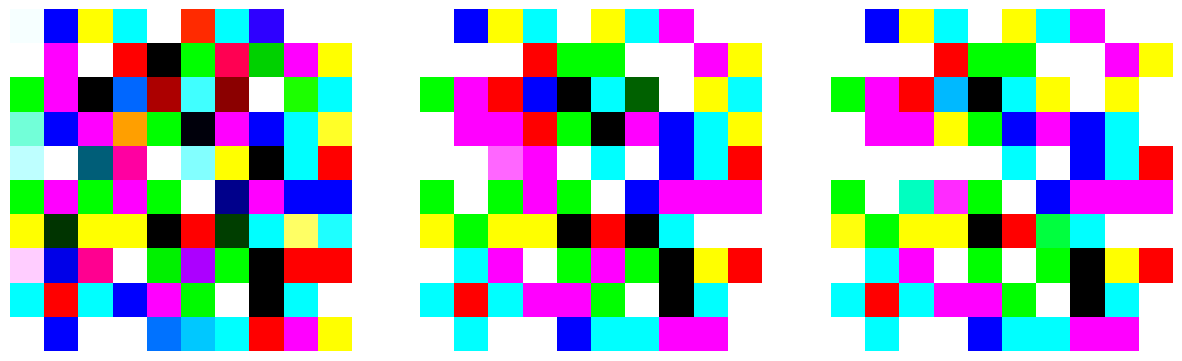

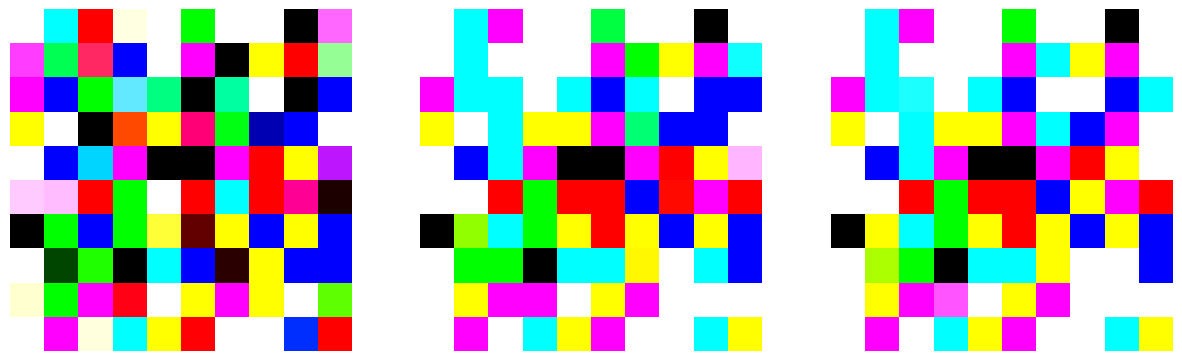

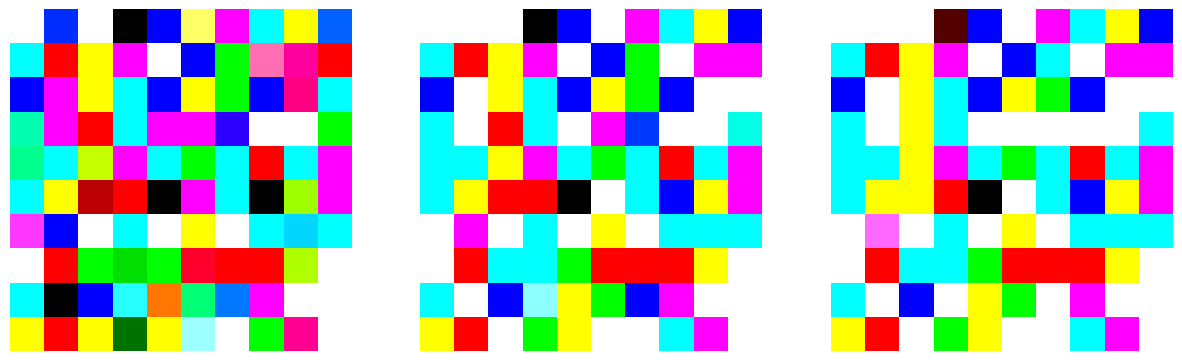

In [81]:
for result in results_2:
    plot_results(result)

O filtro passa-alta em questão é um filtro de realce de borda, onde todos os pixels circundantes ao pixel central têm um peso de -1, e o pixel central tem um peso que é a soma dos pesos dos outros pixels mais 1, neste caso 9. Este tipo de filtro destaca as bordas na imagem ao subtrair a média local do valor de cada pixel. Podemos notar que a medida em que a dimensionalidade do filtro cresce mais pixels são realçados.

### 3. Usando a função da questão 1, pesquise um filtro passa-baixa e aplique-o em 3 imagens distintas, variando o valor de `n` em 3 unidades em cada imagem. O que acontece quando `n` cresce?

In [82]:
np.random.seed()

In [83]:
image_data = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
ppm_file = 'atividade_1_imgs/image_31.ppm'
write_ppm(ppm_file, image_data)

In [84]:
image_data = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
ppm_file = 'atividade_1_imgs/image_32.ppm'
write_ppm(ppm_file, image_data)

In [85]:
image_data = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
ppm_file = 'atividade_1_imgs/image_33.ppm'
write_ppm(ppm_file, image_data)

IMAGENS UTILIZADAS:


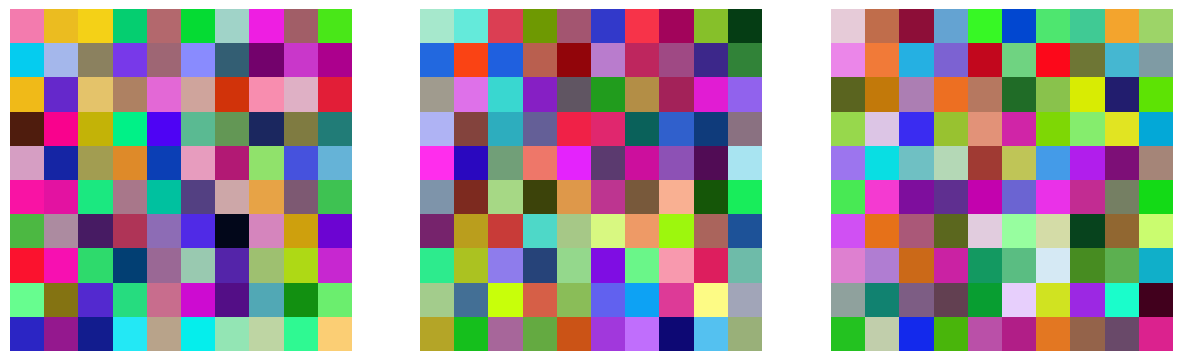

In [86]:
result = ['atividade_1_imgs/image_31.ppm','atividade_1_imgs/image_32.ppm','atividade_1_imgs/image_33.ppm']
print('IMAGENS UTILIZADAS:')
plot_results(result)

In [87]:
filtro_1 = np.ones((3, 3))
filtro_2 = np.ones((7, 7))
filtro_3 = np.ones((9, 9))

In [88]:
images = ['atividade_1_imgs/image_31.ppm', 'atividade_1_imgs/image_32.ppm', 'atividade_1_imgs/image_33.ppm']
filters = [filtro_1, filtro_2, filtro_3]

In [89]:
results_3 = []
for image in images:
    results = []
    for filter in filters:
        ppm_filename = image
        image_data = read_ppm(open(ppm_filename, 'r').read())
        filtered_image_data = apply_filter(image_data, len(filter), filter * (1/len(filter)**2))

        filtered_ppm_filename = f'{image}_{len(filter)}_filtered_image.ppm'
        write_ppm(filtered_ppm_filename, filtered_image_data)

        results.append(filtered_ppm_filename)
    results_3.append(results)

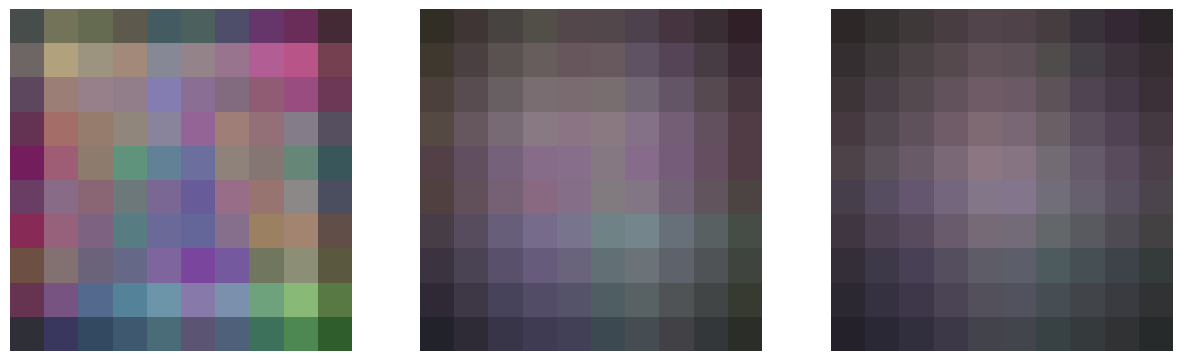

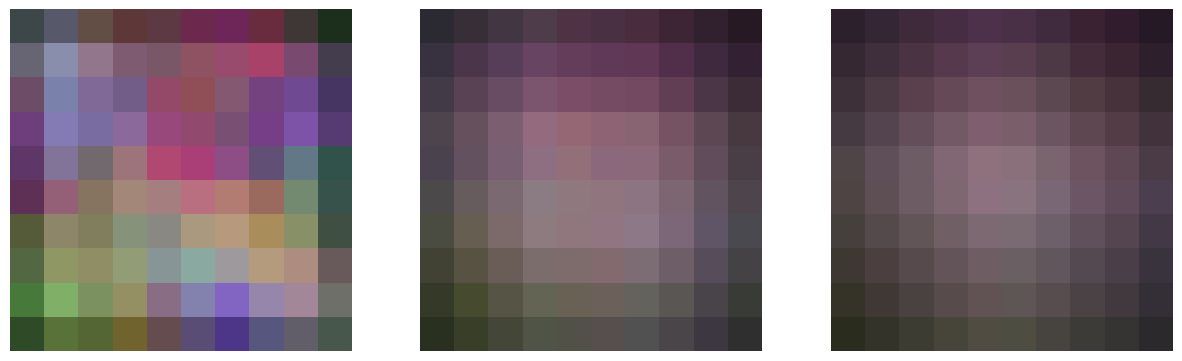

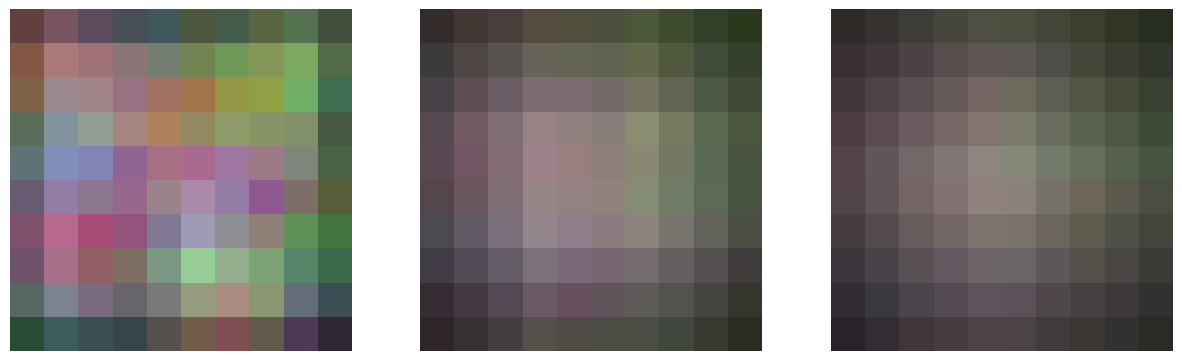

In [90]:
for result in results_3:
    plot_results(result)

O filtro passa-baixa em questão é um filtro de média ponderada onde os pesos são definidos em função de sua distância do peso central. Suaviza a imagem atenuando as altas frequências, que correspondem às transições abruptas. Tende a minimizar ruídos e apresenta o efeito de borramento da imagem.  Podemos notar que a medida em que a dimensionalidade do filtro cresce mais atenuados os valores se tornam.

### 4. Um filtro passa-baixa bastante conhecido é o filtro Gaussiano. Através de uma máscara determinada por um desvio padrão $ \sigma $, é possível fazer o que chamamos de suavização gaussiana de uma imagem. Considere o filtro $5 \times 5 $ de desvio padrão unitário abaixo:

$g = \frac{1}{273} \begin{bmatrix}
1 & 4 & 7 & 4 & 1 \\
4 & 16 & 26 & 16 & 4 \\
7 & 26 & 41 & 26 & 7 \\
4 & 16 & 26 & 16 & 4 \\
1 & 4 & 7 & 4 & 1
\end{bmatrix}$


### Crie uma imagem $I $ de dimensões $100 \times 100 $ que contenha um único valor não nulo localizado no centro da imagem. Utilizando o filtro gaussiano acima, calcule e exiba $I * g $, onde $* $ é a notação para o operador de convolução.

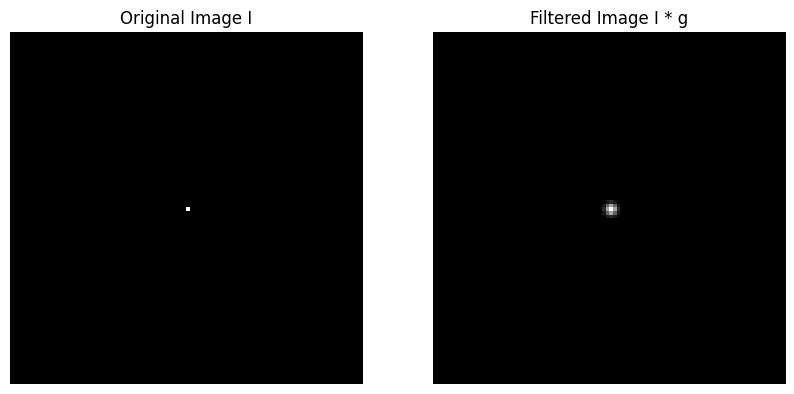

In [91]:
g = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
]) / 273

I = np.zeros((100, 100))
I[50, 50] = 255

from scipy.ndimage import convolve
I_filtered_custom = convolve(I, g)

# Show the original and filtered images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original Image I')
ax[0].axis('off')

ax[1].imshow(I_filtered_custom, cmap='gray')
ax[1].set_title('Filtered Image I * g')
ax[1].axis('off')

plt.show()

### 5.Pesquise e implemente um filtro para remoção de ruídos que não possa ser representado com convoluções.

Um exemplo de filtro para remoção de ruído que não utiliza convolução é o filtro mediana. Ao invés de aplicar um kernel sobre a imagem e calcular uma média ponderada dos pixels, o filtro mediana seleciona o valor mediano de uma janela deslizante sobre a imagem. Este método é particularmente bom para remover ruído do tipo "sal e pimenta" sem desfocar as bordas da imagem.

In [92]:
def median_filter_with_numpy(image, kernel_size):
    assert kernel_size % 2 == 1, "Kernel size must be odd."
    
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    filtered_image = np.zeros_like(image)
    
    for i in range(pad_size, image.shape[0] + pad_size):
        for j in range(pad_size, image.shape[1] + pad_size):
            
            window = padded_image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            filtered_image[i-pad_size, j-pad_size] = np.median(window)
    return filtered_image

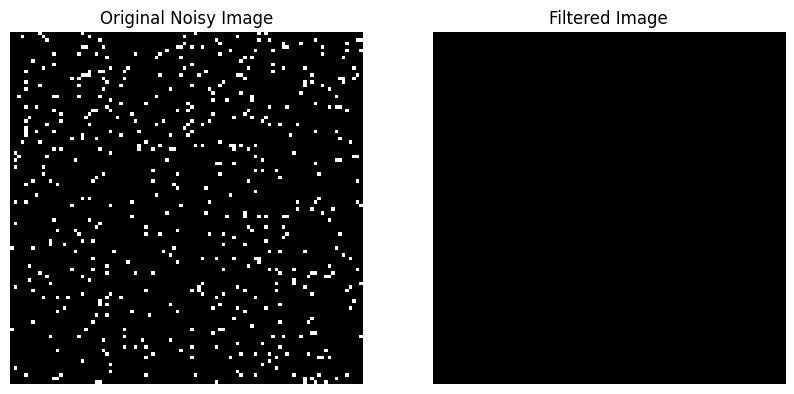

In [93]:
np.random.seed(0)
# Imagem 100x100 com ruído 'sal e pimenta'
image_with_noise = np.random.choice([0, 255], size=(100, 100), p=[0.95, 0.05])

kernel_size_np = 3
filtered_image_np = median_filter_with_numpy(image_with_noise, kernel_size_np)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_with_noise, cmap='gray')
axes[0].set_title('Original Noisy Image')
axes[0].axis('off')

axes[1].imshow(filtered_image_np, cmap='gray')
axes[1].set_title('Filtered Image')
axes[1].axis('off')

plt.show()

### 6. Aplique o detector de canny usando a função `Canny()` da `OpenCV` em uma ou mais imagens de sua escolha. Experimente variar cada um dos parâmetros `threshold1`, `threshold2` e `apertureSize`. Explique com suas pala vras a influência de cada parâmetro no resultado.

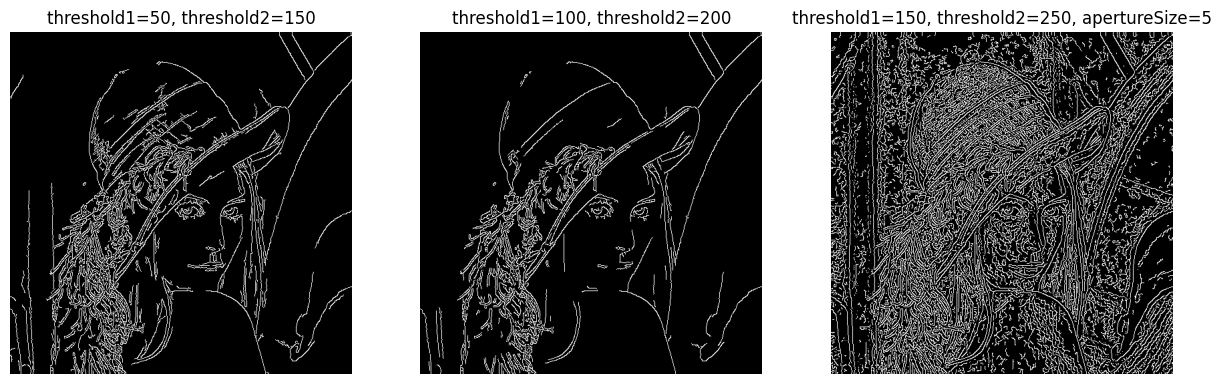

In [94]:
image = cv2.imread('atividade_1_imgs/lena.png', cv2.IMREAD_GRAYSCALE)

edges1 = cv2.Canny(image, threshold1=50, threshold2=150, apertureSize=3)
edges2 = cv2.Canny(image, threshold1=100, threshold2=200, apertureSize=3)
edges3 = cv2.Canny(image, threshold1=150, threshold2=250, apertureSize=5)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(edges1, cmap='gray'), plt.title('threshold1=50, threshold2=150'), plt.axis('off')
plt.subplot(132), plt.imshow(edges2, cmap='gray'), plt.title('threshold1=100, threshold2=200'), plt.axis('off')
plt.subplot(133), plt.imshow(edges3, cmap='gray'), plt.title('threshold1=150, threshold2=250, apertureSize=5'), plt.axis('off')
plt.show()

- threshold1: Este é o limiar inferior para o processo. Valores mais baixos resultam na detecção de bordas mais fracas, enquanto valores mais altos possivelmente excluirão as bordas mais sutis.

- threshold2: Este é o limiar superior para o processo. Este limiar define a força mínima necessária para que uma borda seja considerada "forte" e, portanto, uma verdadeira borda.

- apertureSize: Este é o tamanho da abertura do filtro usado para encontrar os gradientes da imagem. Um apertureSize maior resultará em bordas mais suavizadas, enquanto um valor menor detectará bordas mais finas.

### 7. Escolha uma imagem interessante e gere uma pirâmide aplicando sucessivamente downsampling 3 vezes com fator 1/2. Faça o mesmo com uma pirâmide gaussiana e compare os resultados. Mostre os resultados de cada pirâmide em uma  ́unica imagem lado a lado, como no slides 20 (vai exigir algumas operações de translação de imagens). Obs.: aqui você pode usar funções do OpenCV.

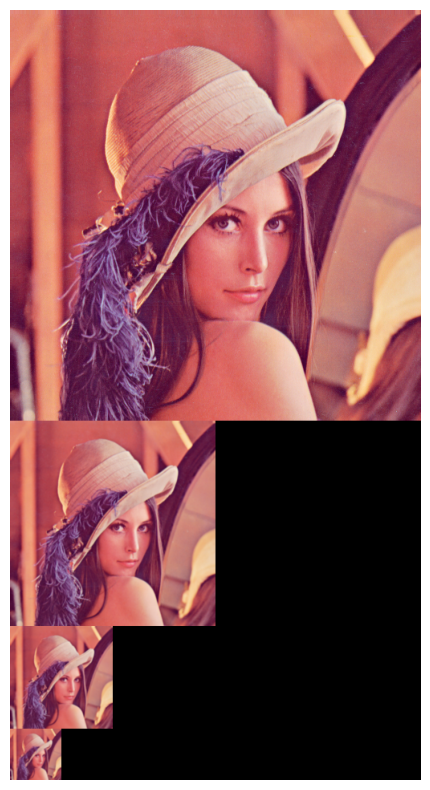

In [95]:
image = cv2.imread('atividade_1_imgs/lena.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pyramid = [image]
for _ in range(3):
    pyramid.append(cv2.pyrDown(pyramid[-1]))

canvas_height = sum(image.shape[0] // (2 ** i) for i in range(4))
canvas_width = pyramid[0].shape[1]
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

y_offset = 0
for img in pyramid:
    height = img.shape[0]
    canvas[y_offset:y_offset + height, :img.shape[1]] = img
    y_offset += height

plt.figure(figsize=(10, 10))
plt.imshow(canvas)
plt.axis('off')
plt.show()

### 8. Usando a função da questão 1, crie funções que apliquem filtros para calcular as imagens representando $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$ e $|\nabla f|$. Em seguida, implemente o operador de Sobel usando estas imagens como entrada. Exiba cada um desses resultados para três imagens distintas.


In [96]:
def apply_filter(image, filter_size, filter_weights):
    assert filter_weights.shape == (filter_size, filter_size), "Filter weights must be of shape (n, n)"
    
    image = image.astype(np.float32)
    filter_weights = filter_weights.astype(np.float32)
    
    pad_width = filter_size // 2
    padded_image = np.pad(image, [(pad_width, pad_width), (pad_width, pad_width), (0, 0)], mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)
    
    # Iterate over every pixel in the image
    for i in range(pad_width, padded_image.shape[0] - pad_width):
        for j in range(pad_width, padded_image.shape[1] - pad_width):
            for k in range(image.shape[2]):

                region = padded_image[i - pad_width:i + pad_width + 1, j - pad_width:j + pad_width + 1, k]
                filtered_value = np.sum(region * filter_weights)
                filtered_image[i - pad_width, j - pad_width, k] = np.clip(filtered_value, 0, 255).astype(np.uint8)
    
    return filtered_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


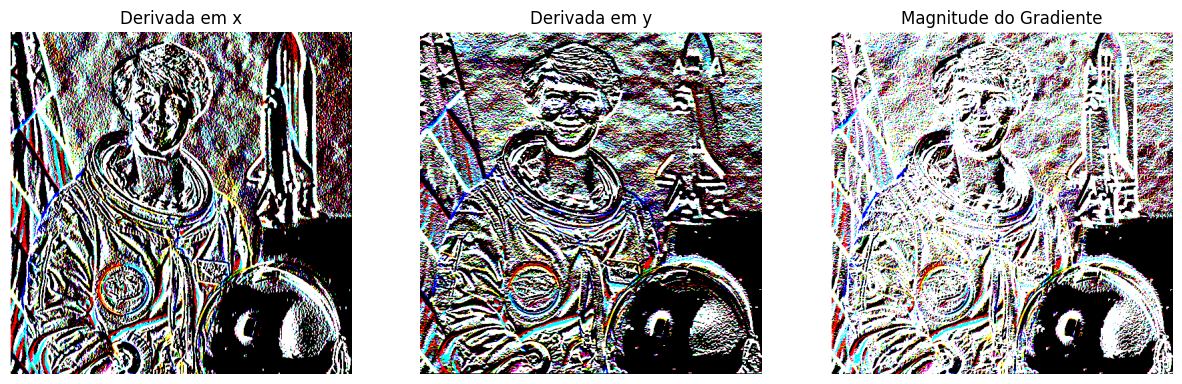

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


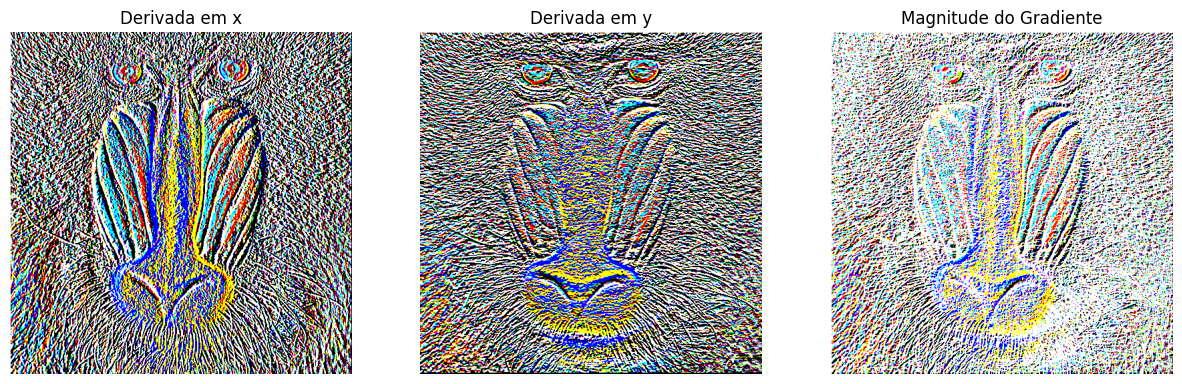

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


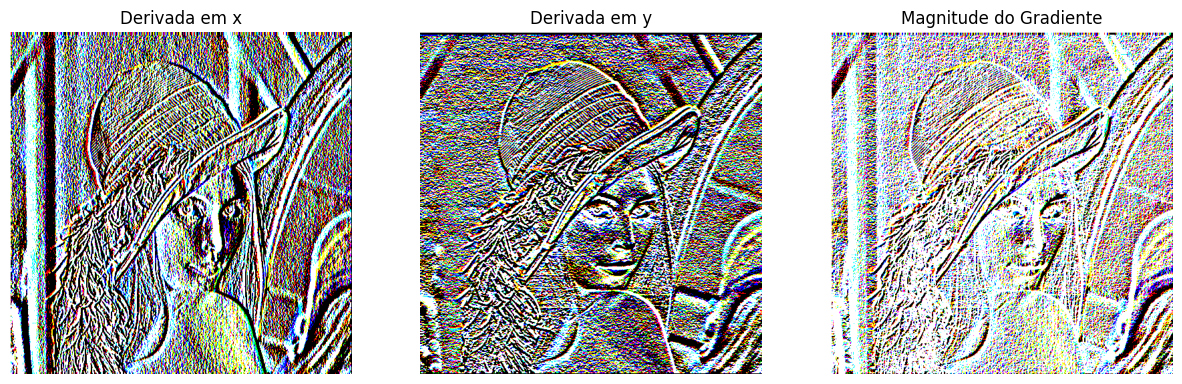

In [97]:
astronaut_image = cv2.imread('atividade_1_imgs/astronaut.png', cv2.COLOR_BGR2RGB)
baboon_image = cv2.imread('atividade_1_imgs/baboon.png', cv2.COLOR_BGR2RGB)
lena_image = cv2.imread('atividade_1_imgs/lena.png', cv2.COLOR_BGR2RGB)

images = [astronaut_image, baboon_image, lena_image]

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

for image in images:
    grad_x = apply_filter(image, 3, sobel_x)
    grad_y = apply_filter(image, 3, sobel_y)
    
    # Calcular a magnitude do gradiente
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Exibir os resultados
    plt.figure(figsize=(15, 5))
    plt.subplot(131), plt.imshow(grad_x, cmap='gray'), plt.title('Derivada em x'), plt.axis('off')
    plt.subplot(132), plt.imshow(grad_y, cmap='gray'), plt.title('Derivada em y'), plt.axis('off')
    plt.subplot(133), plt.imshow(magnitude, cmap='gray'), plt.title('Magnitude do Gradiente'), plt.axis('off')
    
    plt.show()